In [ ]:
# A. Pre-Processing: One-Hot Encoding, Splitting Test/Train sets, Normalization

from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv'
df1 = pd.read_csv(url) 
 
df1._get_numeric_data()
cols = df1.columns
num_cols = df1._get_numeric_data().columns

c1 = ['famhist']
cx = df1[c1] # Features
 
# One-Hot Encoding
fam_en = pd.get_dummies(df1.famhist, prefix='famhist')

fam_en = pd.get_dummies(cx.famhist, prefix='famhist')
df = df1.assign(famhist=fam_en['famhist_Absent'])
df2 = df.rename(columns={"row.names": "famhist_Present"})
df21 = df2.rename(columns={"famhist": "famhist_Absent"})
df_final = df21.assign(famhist_Present=fam_en['famhist_Present'])

X = df_final.iloc[:, 0:10]
y = df1.iloc[:, -1]

# Splitting Test and Train sets for X and y
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Normalizing X_train and X_test
X_train = xTrain.iloc[:,0:10].apply(lambda xTrain: (xTrain-xTrain.mean())/ xTrain.std(), axis=0)
X_test = xTest.iloc[:,0:10].apply(lambda xTest: (xTest-xTest.mean())/ xTest.std(), axis=0)

print("Size of X training set: " +str(len(X_train)))
print("Size of X testing set: " +str(len(X_test)))
print("Size of y training set: " +str(len(y_train)))
print("Size of y testing set: " +str(len(y_test)))
print("\n")
print("X_train Normalized Data: \n" + str(X_train))
print("\n")
print("X_test Normalized Data: \n" + str(X_test))

In [66]:
# Part 1: Logistic Regression Model and PCA Model for all Features

from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
 
url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv'
df1 = pd.read_csv(url) 
 
df1._get_numeric_data()
cols = df1.columns
num_cols = df1._get_numeric_data().columns

c1 = ['famhist']
cx = df1[c1] # Features
 
fam_en = pd.get_dummies(df1.famhist, prefix='famhist')

fam_en = pd.get_dummies(cx.famhist, prefix='famhist')
df = df1.assign(famhist=fam_en['famhist_Absent'])
df2 = df.rename(columns={"row.names": "famhist_Present"})
df21 = df2.rename(columns={"famhist": "famhist_Absent"})
df_final = df21.assign(famhist_Present=fam_en['famhist_Present'])

X = df_final.iloc[:, 0:10]
y = df1.iloc[:, -1]

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.25, random_state = 0)

X_train = xTrain.iloc[:,0:10].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
X_test = xTest.iloc[:,0:10].apply(lambda x: (x-x.mean())/ x.std(), axis=0)

# Building Logistic Regression Model
model = LogisticRegression()
# Fitting Model
model.fit(X_train, y_train)
# Prediction based on X_test
pred = model.predict(X_test)
# Finding Accuracy
score = model.score(X_test, y_test)
# Finding weight parameters
parameters = model.coef_

print("Coefficients of Model of Logistic Regression: \n" + str(parameters))
print("\n")
print("Accuracy of Model of Logistic Regrssion: " + str(score*100))
print("\n\n")
print("PCA MODEL")

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building PCA Model
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Variance Ration
explained_variance = pca.explained_variance_ratio_

from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
#print(pd.DataFrame(X_train).sample(5))

X_train_pca = pd.DataFrame(X_train, columns=['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']) # PC=principal component
print(X_train_pca)

X_test_pca = pd.DataFrame(X_test, columns=['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']) # PC=principal component
print(X_test_pca)

Coefficients of Model of Logistic Regression: 
[[ 0.17620596  0.0318447   0.41934621  0.23297107  0.20656574 -0.17620596
   0.50230761 -0.24665665 -0.05790607  0.72821719]]


Accuracy of Model of Logistic Regrssion: 74.13793103448276



PCA MODEL
          PC1       PC2       PC3  ...       PC8       PC9          PC10
0    1.399114 -0.805093  0.962477  ... -0.276041  0.024121  5.216800e-15
1   -0.143066 -2.058010  0.118136  ... -0.884720  1.005516 -3.947405e-17
2    2.689873 -0.601413  0.241692  ...  0.313680  0.165402 -2.531579e-17
3   -1.759899  0.398165 -0.630327  ... -0.208859 -0.490569  1.224830e-17
4    1.433292 -1.292658 -0.883583  ... -0.765157 -0.771160 -5.375280e-17
..        ...       ...       ...  ...       ...       ...           ...
341  2.090629 -0.728337  0.624713  ... -0.127684  0.078204 -2.299703e-17
342 -1.076109 -2.427517 -0.319251  ... -0.406929  0.330784  9.549679e-18
343 -0.977532  1.662393  1.407279  ...  0.088053 -0.310473 -8.089102e-17
344  0.775608 -1.571449

In [59]:
# Part 1: Calculating Variance and Accuracy of PCA on all features

from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
 
url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv'
df1 = pd.read_csv(url) 
 
df1._get_numeric_data()
cols = df1.columns
num_cols = df1._get_numeric_data().columns

c1 = ['famhist']
cx = df1[c1] # Features
 
fam_en = pd.get_dummies(df1.famhist, prefix='famhist')

fam_en = pd.get_dummies(cx.famhist, prefix='famhist')
df = df1.assign(famhist=fam_en['famhist_Absent'])
df2 = df.rename(columns={"row.names": "famhist_Present"})
df21 = df2.rename(columns={"famhist": "famhist_Absent"})
df_final = df21.assign(famhist_Present=fam_en['famhist_Present'])

X = df_final.iloc[:, 0:10]
y = df1.iloc[:, -1]

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.25, random_state = 0)

X_train = xTrain.iloc[:,0:10].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
X_test = xTest.iloc[:,0:10].apply(lambda x: (x-x.mean())/ x.std(), axis=0)

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from sklearn.decomposition import PCA

pca = PCA(n_components=10
          )
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(pd.DataFrame(X_train).sample(5))

X_train_pca = pd.DataFrame(X_train, columns=['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']) # PC=principal component
X_test_pca = pd.DataFrame(X_test, columns=['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']) # PC=principal component

variance = pca.explained_variance_ratio_ #calculate variance ratios
print("Variance of PCs: \n" +str(variance))
print("\n")
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
print("Variance Ratios of PCs: " + str(var)) #cumulative sum of variance explained with [n] features

model_pca = LogisticRegression()
model_pca.fit(X_train, y_train)
pred = model.predict(X_test)
score_pca = model.score(X_test, y_test)

print("\n")
print("Accuracy of PCA Model: " + str(score_pca*100))

            0         1         2  ...         7         8             9
130  0.747372 -1.538334 -0.723615  ... -0.323225 -0.241028 -4.855221e-17
88   1.818127  2.010864 -1.149437  ... -0.542072 -0.027250 -2.079693e-17
226  1.698914 -1.087987  0.823378  ...  0.086976  0.283031 -3.727911e-17
180 -2.573784  0.250412  0.531288  ... -0.176913  0.429286 -9.578757e-18
345 -0.250253  1.132299 -0.760666  ... -0.892138 -0.657076 -1.123474e-18

[5 rows x 10 columns]
Variance of PCs: 
[3.03303074e-01 1.83259998e-01 1.23329699e-01 1.02035896e-01
 8.65859714e-02 7.64184112e-02 6.30279309e-02 4.60522618e-02
 1.59867581e-02 8.02752969e-33]


Variance Ratios of PCs: [30.3 48.6 60.9 71.1 79.8 87.4 93.7 98.3 99.9 99.9]


Accuracy of PCA Model: 72.41379310344827


In [67]:
# Part 1: PCA Model for PCs with 90% above Variance and its Accuracy

from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
 
url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv'
df1 = pd.read_csv(url) 
 
df1._get_numeric_data()
cols = df1.columns
num_cols = df1._get_numeric_data().columns

c1 = ['famhist']
cx = df1[c1] # Features
 
fam_en = pd.get_dummies(df1.famhist, prefix='famhist')

fam_en = pd.get_dummies(cx.famhist, prefix='famhist')
df = df1.assign(famhist=fam_en['famhist_Absent'])
df2 = df.rename(columns={"row.names": "famhist_Present"})
df21 = df2.rename(columns={"famhist": "famhist_Absent"})
df_final = df21.assign(famhist_Present=fam_en['famhist_Present'])

X = df_final.iloc[:, 0:10]
y = df1.iloc[:, -1]

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.25, random_state = 0)

X_train = xTrain.iloc[:,0:10].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
X_test = xTest.iloc[:,0:10].apply(lambda x: (x-x.mean())/ x.std(), axis=0)

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from sklearn.decomposition import PCA

pca = PCA(n_components=7)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(pd.DataFrame(X_train).sample(5))

variance = pca.explained_variance_ratio_ #calculate variance ratios
print("Variance of PCs: \n" +str(variance))
print("\n")
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
print("Variance Ratios of PCs: " + str(var)) #cumulative sum of variance explained with [n] features

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))


            0         1         2         3         4         5         6
342 -1.076109 -2.427517 -0.319251 -0.457257  0.543620 -0.433154 -0.762983
302 -3.195928 -0.006340  0.066625 -0.527754 -0.239802 -0.183922 -0.143388
112  1.135851 -2.010210  1.728687  4.549424 -2.699742 -1.991256  0.354878
312  1.853993 -0.811015  0.944305  0.128647 -0.557388  0.370041  0.154384
252  0.753149  1.883036  0.922819 -0.270015  0.026153 -0.985488 -0.968843
Variance of PCs: 
[0.30330307 0.18326    0.1233297  0.1020359  0.08658597 0.07641841
 0.06302793]


Variance Ratios of PCs: [30.3 48.6 60.9 71.1 79.8 87.4 93.7]
Accuracy: 0.7068965517241379


In [ ]:
# Part 2: K-Means Clustering Algorithm and its Accuracy
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
 
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
 
url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv'
df1 = pd.read_csv(url) 
 
df1._get_numeric_data()
cols = df1.columns
num_cols = df1._get_numeric_data().columns

c1 = ['famhist']
cx = df1[c1] # Features
 
fam_en = pd.get_dummies(df1.famhist, prefix='famhist')

fam_en = pd.get_dummies(cx.famhist, prefix='famhist')
df = df1.assign(famhist=fam_en['famhist_Absent'])
df2 = df.rename(columns={"row.names": "famhist_Present"})
df21 = df2.rename(columns={"famhist": "famhist_Absent"})
df_final = df21.assign(famhist_Present=fam_en['famhist_Present'])

X = df_final.iloc[:, 0:10]
y = df1.iloc[:, -1]

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.25, random_state = 0)

X_train = xTrain.iloc[:,0:10].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
X_test = xTest.iloc[:,0:10].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
y_test = yTest

model = LogisticRegression()
model.fit(X_train, y_train)
predicted_classes = model.predict(X_train)
accuracy = accuracy_score(y_train,predicted_classes)
parameters = model.coef_

from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.cluster import KMeans
X_scaled = X_train
nclusters = 2 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
print("Cluster Prediction: \n" + str(y_cluster_kmeans))
print("\n")
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
print("Accuracy of K-Means: " +str(score))

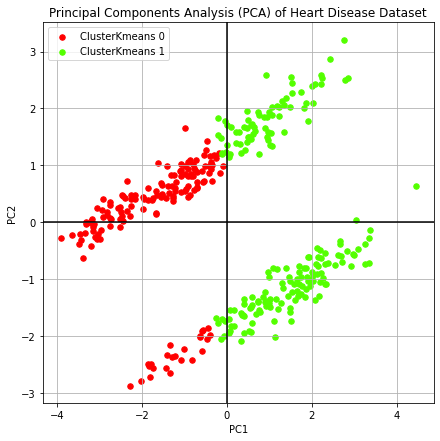

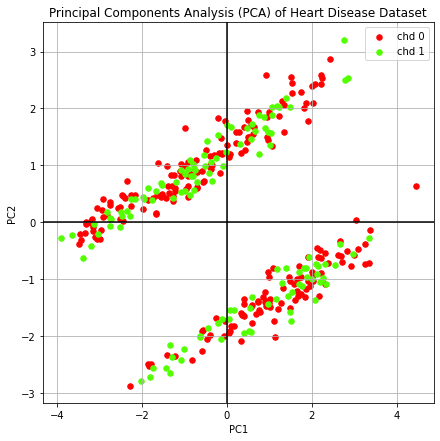

In [26]:
# Part 2: Visualization
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
 
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
 
url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv'
df1 = pd.read_csv(url) 
 
 
df1._get_numeric_data()
cols = df1.columns
num_cols = df1._get_numeric_data().columns

c1 = ['famhist']
cx = df1[c1] # Features

 
fam_en = pd.get_dummies(df1.famhist, prefix='famhist')


fam_en = pd.get_dummies(cx.famhist, prefix='famhist')
df = df1.assign(famhist=fam_en['famhist_Absent'])
df2 = df.rename(columns={"row.names": "famhist_Present"})
df21 = df2.rename(columns={"famhist": "famhist_Absent"})
df_final = df21.assign(famhist_Present=fam_en['famhist_Present'])

X = df_final.iloc[:, 0:10]
y = df1.iloc[:, -1]


from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.25, random_state = 0)

X_train = xTrain.iloc[:,0:10].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
X_test = xTest.iloc[:,0:10].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
y_test = yTest


model = LogisticRegression()
model.fit(X_train, y_train)
predicted_classes = model.predict(X_train)
accuracy = accuracy_score(y_train, predicted_classes)
parameters = model.coef_

from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.cluster import KMeans
X_scaled = X_train
nclusters = 2 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
#print("Cluster Prediction: \n" + str(y_cluster_kmeans))
#print("\n")
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
scores = metrics.silhouette_samples(X_scaled, y_cluster_kmeans)

df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['chd'] = df_final['chd']

from sklearn.decomposition import PCA
import matplotlib as mpl
ndimensions = 2

pca = PCA(n_components=ndimensions, random_state=seed)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2']) # PC=principal component

df_plot = X_pca.copy()
df_plot['ClusterKmeans'] = y_cluster_kmeans
df_plot['chd'] = y # also add actual labels so we can use it in later plots

def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    fig, ax = plt.subplots(figsize = (7,7))
    cmap = mpl.cm.get_cmap('prism')
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Heart Disease Dataset");

plotData(df_plot, 'ClusterKmeans')
plotData(df_plot, 'chd')